In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9e13b3d4-dc49-490f-b599-38d8d3854caf',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-02T20:51:59.328Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 10077}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11621, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [9]:
import pandas as pd

pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)

In [4]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19734756.00,19734756.00,False,NaN,1,NaN,NaN,None,2024-08-02T20:50:00.000Z,62249.29,42363991679.40,8.35,-0.39,-3.49,-7.81,4.21,-10.07,-2.60,1228474451267.34,55.41,1307234985657.49,None,2024-08-02T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
1,1027,Ethereum,ETH,ethereum,9184,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120253156.18,120253156.18,True,NaN,2,NaN,NaN,None,2024-08-02T20:49:00.000Z,3008.98,20827192398.40,4.61,-0.08,-4.54,-7.58,-8.08,-20.27,-4.00,361839894007.02,16.33,361839894007.02,None,2024-08-02T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
2,825,Tether USDt,USDT,tether,93440,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114501280130.74,117068083204.25,True,NaN,3,NaN,NaN,None,2024-08-02T20:49:00.000Z,1.00,66979247008.85,5.67,0.05,0.04,-0.06,0.06,-0.05,-0.07,114435463332.54,5.16,117000790974.87,None,2024-08-02T20:49:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-02 21:52:01.042566
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145937258.04,145937258.04,False,NaN,4,NaN,NaN,None,2024-08-02T20:49:00.000Z,554.27,2024582565.77,2.63,0.03,-2.44,-4.30,0.02,-11.51,-6.33,80888985658.68,3.65,80888985658.68,None,2024-08-02T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465259016.96,581339708.39,True,NaN,5,NaN,NaN,None,2024-08-02T20:49:00.000Z,152.49,4412833141.08,1.42,0.95,-7.04,-15.96,8.16,-8.17,3.44,70948729757.97,3.20,88650219265.76,None,2024-08-02T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
5,3408,USDC,USDC,usd-coin,21283,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33009516803.72,33009516803.72,False,NaN,6,NaN,NaN,None,2024-08-02T20:49:00.000Z,1.00,8138625840.60,13.29,0.04,0.03,0.03,0.05,0.03,0.04,33022419147.23,1.49,33022419147.23,None,2024-08-02T20:49:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-02 21:52:01.042566
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,55999283950.00,99987385748.00,False,NaN,7,NaN,NaN,None,2024-08-02T20:50:00.000Z,0.57,1889667971.00,-5.16,1.60,-2.63,-4.47,23.15,9.38,7.01,31994436766.16,1.44,57133653342.30,None,2024-08-02T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145372336383.71,145372336383.71,True,NaN,8,NaN,NaN,None,2024-08-02T20:50:00.000Z,0.11,822806654.71,1.28,0.98,-2.49,-14.76,-3.78,-29.03,-29.99,16457950412.15,0.74,16457950412.15,None,2024-08-02T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
8,11419,Toncoin,TON,toncoin,483,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518032214.44,5109914828.01,True,NaN,9,3414166606.00,21488622122.77,None,2024-08-02T20:49:00.000Z,6.29,274299601.02,1.46,-0.80,-5.84,-6.47,-19.20,-6.75,9.40,15848389663.83,0.72,32161590657.46,None,202

In [6]:
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9e13b3d4-dc49-490f-b599-38d8d3854caf',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
#       print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    global df
#     df = pd.concat([df, df2], ignore_index=True)
    
    if not os.path.isfile(r'C:\Users\omoke\Downloads\csv files\API.csv'):
        df.to_csv(r'C:\Users\omoke\Downloads\csv files\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\omoke\Downloads\csv files\API.csv', mode='a', header-=False)

        

In [7]:
import os
from time import time, sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19734756.00,19734756.00,False,NaN,1,NaN,NaN,None,2024-08-02T20:50:00.000Z,62249.29,42363991679.40,8.35,-0.39,-3.49,-7.81,4.21,-10.07,-2.60,1228474451267.34,55.41,1307234985657.49,None,2024-08-02T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
1,1027,Ethereum,ETH,ethereum,9184,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120253156.18,120253156.18,True,NaN,2,NaN,NaN,None,2024-08-02T20:49:00.000Z,3008.98,20827192398.40,4.61,-0.08,-4.54,-7.58,-8.08,-20.27,-4.00,361839894007.02,16.33,361839894007.02,None,2024-08-02T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
2,825,Tether USDt,USDT,tether,93440,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114501280130.74,117068083204.25,True,NaN,3,NaN,NaN,None,2024-08-02T20:49:00.000Z,1.00,66979247008.85,5.67,0.05,0.04,-0.06,0.06,-0.05,-0.07,114435463332.54,5.16,117000790974.87,None,2024-08-02T20:49:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-02 21:52:01.042566
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145937258.04,145937258.04,False,NaN,4,NaN,NaN,None,2024-08-02T20:49:00.000Z,554.27,2024582565.77,2.63,0.03,-2.44,-4.30,0.02,-11.51,-6.33,80888985658.68,3.65,80888985658.68,None,2024-08-02T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465259016.96,581339708.39,True,NaN,5,NaN,NaN,None,2024-08-02T20:49:00.000Z,152.49,4412833141.08,1.42,0.95,-7.04,-15.96,8.16,-8.17,3.44,70948729757.97,3.20,88650219265.76,None,2024-08-02T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
5,3408,USDC,USDC,usd-coin,21283,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33009516803.72,33009516803.72,False,NaN,6,NaN,NaN,None,2024-08-02T20:49:00.000Z,1.00,8138625840.60,13.29,0.04,0.03,0.03,0.05,0.03,0.04,33022419147.23,1.49,33022419147.23,None,2024-08-02T20:49:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-02 21:52:01.042566
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,55999283950.00,99987385748.00,False,NaN,7,NaN,NaN,None,2024-08-02T20:50:00.000Z,0.57,1889667971.00,-5.16,1.60,-2.63,-4.47,23.15,9.38,7.01,31994436766.16,1.44,57133653342.30,None,2024-08-02T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145372336383.71,145372336383.71,True,NaN,8,NaN,NaN,None,2024-08-02T20:50:00.000Z,0.11,822806654.71,1.28,0.98,-2.49,-14.76,-3.78,-29.03,-29.99,16457950412.15,0.74,16457950412.15,None,2024-08-02T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 21:52:01.042566
8,11419,Toncoin,TON,toncoin,483,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518032214.44,5109914828.01,True,NaN,9,3414166606.00,21488622122.77,None,2024-08-02T20:49:00.000Z,6.29,274299601.02,1.46,-0.80,-5.84,-6.47,-19.20,-6.75,9.40,15848389663.83,0.72,32161590657.46,None,202

In [13]:
df_coin = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', \
                                'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', \
                                'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']] \
                                 .mean()

In [24]:
len(df_coin)

15

In [14]:
df_coin.transpose()

name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,Toncoin,Cardano,TRON,Avalanche,Shiba Inu,Bitcoin Cash,Polkadot
quote.USD.percent_change_1h,-0.39,0.01,0.01,0.13,1.38,0.01,1.56,0.87,-0.83,0.99,0.18,-0.02,0.55,-0.18,0.75
quote.USD.percent_change_24h,-3.45,-4.71,0.01,-2.52,-7.07,0.01,-2.71,-2.67,-5.94,-3.68,-3.42,-5.26,-3.59,-4.38,-2.31
quote.USD.percent_change_7d,-7.75,-7.50,-0.09,-4.26,-15.82,0.01,-4.41,-14.68,-6.50,-11.40,-10.03,-16.07,-11.15,5.10,-12.12
quote.USD.percent_change_30d,4.32,-7.97,0.02,0.13,8.46,0.02,23.29,-3.70,-19.24,-8.60,-3.80,-10.47,-7.99,5.93,-15.37
quote.USD.percent_change_60d,-10.00,-20.24,-0.08,-11.45,-8.05,0.01,9.45,-29.02,-6.77,-20.12,8.67,-33.58,-39.64,-15.93,-27.60
quote.USD.percent_change_90d,-2.52,-3.86,-0.10,-6.23,3.68,0.02,7.13,-29.98,9.09,-21.48,0.82,-36.36,-41.31,-15.73,-28.56


In [29]:
df_coin_stacked = df_coin.stack()


In [30]:
# converting the series produce by the code above to a data frame

df3 = df_coin_stacked.to_frame(name='values')

In [55]:
index = pd.Index(range(len(df_coin_stacked)))

df4 = df3.reset_index()


In [56]:
df4.rename(columns={'level_1':'percent_change'}, inplace=True)

In [57]:
df4

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.39
1,Bitcoin,quote.USD.percent_change_24h,-3.45
2,Bitcoin,quote.USD.percent_change_7d,-7.75
3,Bitcoin,quote.USD.percent_change_30d,4.32
4,Bitcoin,quote.USD.percent_change_60d,-10.00
5,Bitcoin,quote.USD.percent_change_90d,-2.52
6,Ethereum,quote.USD.percent_change_1h,0.01
7,Ethereum,quote.USD.percent_change_24h,-4.71
8,Ethereum,quote.USD.percent_change_7d,-7.50
9,Ethereum,quote.USD.percent_change_30d,-7.97


In [58]:
df4['percent_change'] = df4['percent_change'].replace([\
                                'quote.USD.percent_change_1h', \
                               'quote.USD.percent_change_24h', \
                               'quote.USD.percent_change_7d', \
                               'quote.USD.percent_change_30d', \
                               'quote.USD.percent_change_60d', \
                               'quote.USD.percent_change_90d'],\
                              ['1h', '24h', '7d', '30d', '60d', '90d'])

# another way of getting this same results

# Create a mapping dictionary
# percent_change_mapping = {
#     'quote.USD.percent_change_1h': '1h',
#     'quote.USD.percent_change_24h': '24h',
#     'quote.USD.percent_change_7d': '7d',
#     'quote.USD.percent_change_30d': '30d',
#     'quote.USD.percent_change_60d': '60d',
#     'quote.USD.percent_change_90d': '90d'
# }

# Apply the mapping to the DataFrame column
# df4['percent_change'] = df4['percent_change'].map(percent_change_mapping)

df4

,name,percent_change,values
0,Bitcoin,1h,-0.39
1,Bitcoin,24h,-3.45
2,Bitcoin,7d,-7.75
3,Bitcoin,30d,4.32
4,Bitcoin,60d,-10.00
5,Bitcoin,90d,-2.52
6,Ethereum,1h,0.01
7,Ethereum,24h,-4.71
8,Ethereum,7d,-7.50
9,Ethereum,30d,-7.97


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\omoke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


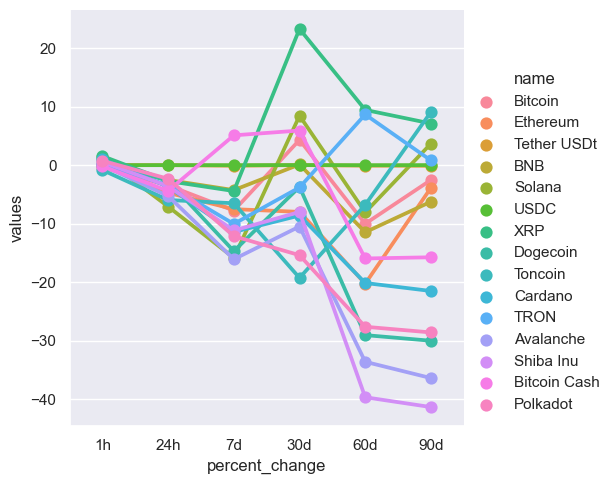

In [69]:
sns.set_theme(style = "darkgrid")

sns.catplot(x='percent_change', y='values', hue='name', data=df4, kind='point')


In [65]:
usd_price = df[['name', 'quote.USD.price', 'timestamp']]

bitcoin = usd_price.query("name == 'Bitcoin'")
bitcoin

,name,quote.USD.price,timestamp
0,Bitcoin,62249.29,2024-08-02 21:52:01.042566
15,Bitcoin,62249.29,2024-08-02 21:52:02.422867
30,Bitcoin,62289.29,2024-08-02 21:53:04.178680
45,Bitcoin,62292.94,2024-08-02 21:54:05.618760
60,Bitcoin,62304.23,2024-08-02 21:55:07.457348
75,Bitcoin,62304.83,2024-08-02 21:56:09.139137
90,Bitcoin,62330.98,2024-08-02 21:57:11.211512


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

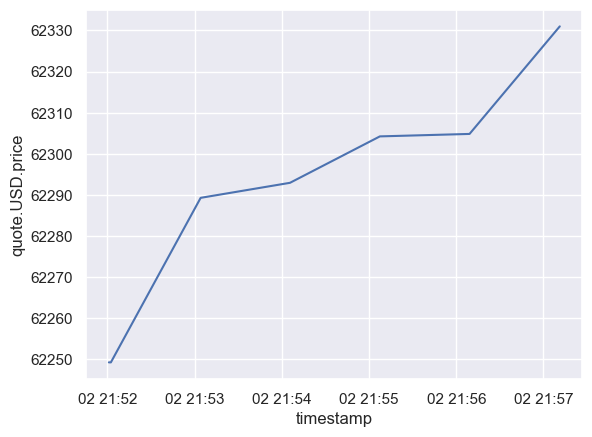

In [67]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=bitcoin)